Question 3

Text(0.5, 1.0, 'Image Warpped')

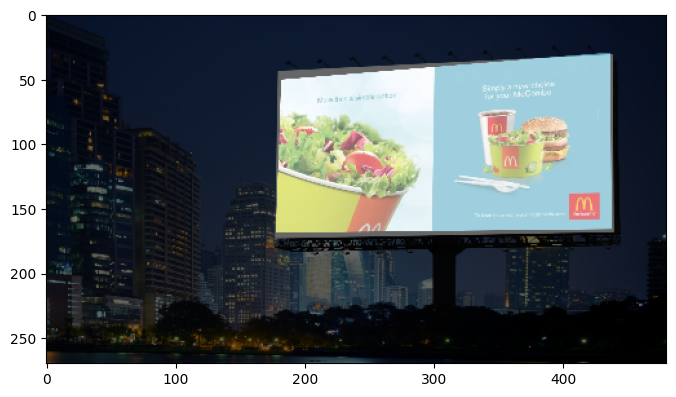

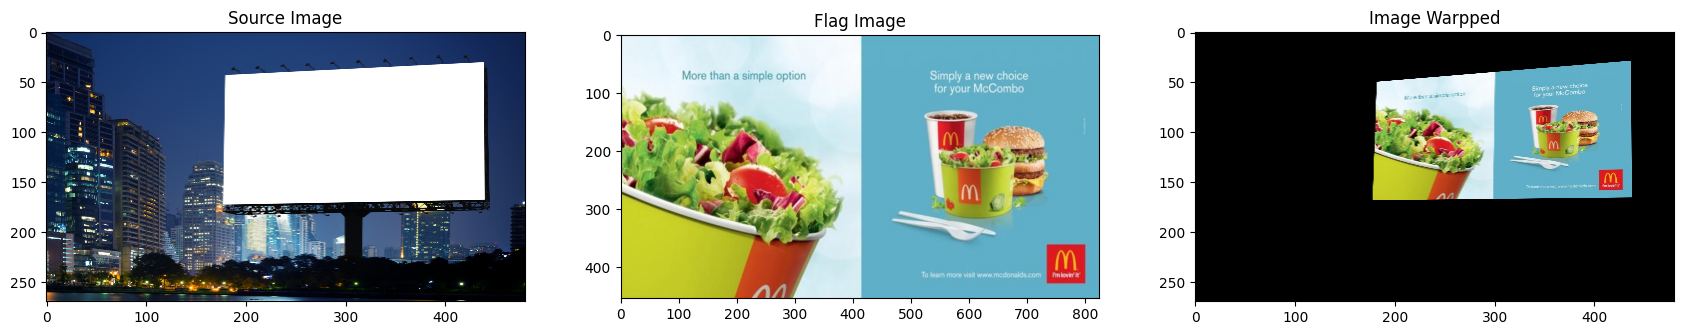

In [11]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

N = 4 # Number of points
n = 0

# Parameters of the two images
p = np.empty((N,2))
p_flag = np.empty((N,2))

# Mouse callback function
def draw_circle(event,x,y,flags,param):
    global n
    p = param[0]
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(param[1],(x,y),5,(255,0,0),-1)
        p[n] = (x,y)
        n += 1

# Import the images and make copies
bground = cv.imread('download.jpg',cv.IMREAD_REDUCED_COLOR_4)
flag = cv.imread('portrait.jpg', cv.IMREAD_COLOR)
bground_copy = bground.copy()
flag_copy = flag.copy()

# Getting the mouse points of the base image
cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
param = [p, bground_copy]
cv.setMouseCallback('Image',draw_circle, param)

while(1):
    cv.imshow('Image', bground)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break
    
# Getting the mouse points of the flag
n = 0
cv.namedWindow('Image Flag', cv.WINDOW_AUTOSIZE)
param = [p_flag, flag_copy]
cv.setMouseCallback('Image Flag',draw_circle, param)

while(1):
    cv.imshow('Image Flag', flag_copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break
cv.destroyAllWindows()

#Finding the homography
H, _= cv.findHomography(p, p_flag) 

# Warping image of flag
warped_img = cv.warpPerspective(flag, np.linalg.inv(H), (bground.shape[1],bground.shape[0])) 

# Blending
alpha = 0.4
beta = 1-alpha

blended = cv.addWeighted(bground, alpha, warped_img, beta, 0.0)
fig, ax = plt.subplots(1,1,figsize= (8,8))
ax.imshow(cv.cvtColor(blended,cv.COLOR_BGR2RGB))

# Plotting the results
fig,ax=plt.subplots(1,3,figsize=(21,7))
ax[0].imshow(cv.cvtColor(bground,cv.COLOR_BGR2RGB))
ax[0].set_title("Source Image")
ax[1].imshow(cv.cvtColor(flag,cv.COLOR_BGR2RGB))
ax[1].set_title("Flag Image")
ax[2].imshow(cv.cvtColor(warped_img,cv.COLOR_BGR2RGB))
ax[2].set_title("Image Warpped")